# Learning Shape file handling 

tutorial:  https://chrishavlin.wordpress.com/2016/11/16/shapefiles-tutorial/  

pyshp documentation:  https://pypi.python.org/pypi/pyshp  
mapping:  https://gis.stackexchange.com/questions/93136/how-to-plot-geo-data-using-matplotlib-python/93201#93201


# Prerequisites

##install packages

In [214]:
!pip install pyshp

In [174]:
!pip install descartes

In [2]:
#install 7zip reader
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
Selecting previously unselected package liblzo2-2:amd64.
(Reading database ... 16279 files and directories currently installed.)
Preparing to unpack .../liblzo2-2_2.08-1.2_amd64.deb ...
Unpacking liblzo2-2:amd64 (2.08-1.2) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../libarchive13_3.2.2-3.1_amd64.deb ...
Unpacking libarchive13:amd64 (3.2.2-3.1) ...
Selecting previously unselected package libarchive-dev:amd64.
Preparing to unpack .../libarchive-dev_3.2.2-3.1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1) ...
Processing triggers for libc-bin (2.26-0ubuntu2) ...
Setting up liblzo2-2:amd64 (2.08-1.2) ...
Setting up libarchive13:amd64 (3.2.2-3.1) ...
Setting up libarchive-dev:amd64 (3.2

##Download shapefile from dropbox link

In [21]:
!curl -L -o countries.zip https://www.dropbox.com/s/30csqx4gg90xg7d/countries.zip?dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 22.2M  100 22.2M    0     0  7603k      0  0:00:03  0:00:03 --:--:-- 37.1M


In [216]:
#unzip
!unzip countries.zip

Archive:  countries.zip
replace countries.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Import packages

In [0]:
import shapefile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Import shapefile

In [0]:
##
#dat_dir = ""
#shp_file_base = "countires.shp"
#sf = shapefile.Reader(dat_dir+shp_file_base)

sf = shapefile.Reader("countries.shp")

In [31]:
##check the number of data entry
print 'number of shapes imported:',len(sf.shapes())

number of shapes imported: 264


In [188]:
##ckeck field names
sf.fields


[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 9, 0],
 ['NAME', 'C', 80, 0],
 ['ISO3', 'C', 80, 0],
 ['ISO2', 'C', 4, 0],
 ['FIPS', 'C', 6, 0],
 ['COUNTRY', 'C', 75, 0],
 ['ENGLISH', 'C', 50, 0],
 ['FRENCH', 'C', 50, 0],
 ['SPANISH', 'C', 50, 0],
 ['LOCAL', 'C', 54, 0],
 ['FAO', 'C', 55, 0],
 ['WAS_ISO', 'C', 4, 0],
 ['SOVEREIGN', 'C', 40, 0],
 ['CONTINENT', 'C', 55, 0],
 ['UNREG1', 'C', 75, 0],
 ['UNREG2', 'C', 75, 0],
 ['EU', 'N', 4, 0],
 ['SQKM', 'F', 19, 11]]

In [0]:
##attribution table
records = sf.records()

In [189]:
#boundary
sf.bbox

[-179.99999999999997, -59.48429488968026, 180.0, 83.6274185352932]

In [125]:
##pick up only data index and country name
for index, item in enumerate( record[1:]):
        print index, item[6]

0 Afghanistan
1 Albania
2 Algeria
3 American Samoa
4 Andorra
5 Angola
6 Anguilla
7 Antigua and Barbuda
8 Argentina
9 Armenia
10 Aruba
11 Australia
12 Australia
13 Austria
14 Azerbaijan
15 Bahamas
16 Bahrain
17 Brunei
18 United States Minor Outlying Islands
19 Bangladesh
20 Barbados
21 Belarus
22 Belgium
23 Belize
24 Benin
25 Bermuda
26 Bhutan
27 Bolivia
28 Bonaire, Saint Eustatius and Saba
29 Bosnia and Herzegovina
30 Botswana
31 Bouvet Island
32 Brazil
33 British Indian Ocean Territory
34 British Virgin Islands
35 Bulgaria
36 Burkina Faso
37 Myanmar
38 Burundi
39 Cambodia
40 Cameroon
41 Canada
42 Cape Verde
43 Cayman Islands
44 Central African Republic
45 Chad
46 Chile
47 China
48 Christmas Island
49 Clipperton Island
50 Cocos Islands
51 Colombia
52 Comoros
53 Republic of Congo
54 Democratic Republic of the Congo
55 Cook Islands
56 Australia
57 Costa Rica
58 Croatia
59 Cuba
60 Curacao
61 Cyprus
62 Czech Republic
63 C�te d'Ivoire
64 Denmark
65 Djibouti
66 Dominica
67 Dominican Republic

In [143]:
#get list of country name
country_name = pd.Series(np.zeros(len(records)))
                         
for index, item in enumerate( record):
        country_name[index] =  item[6]
    
print country_name.head()

0             �land
1       Afghanistan
2           Albania
3           Algeria
4    American Samoa
dtype: object


In [165]:
##pick up only Japan
country_name_japan = country_name[country_name=='Japan']
country_name_japan.index[0]

120

In [0]:
shape_japan = sf.shape(country_name_japan.index[0])

#Plotting

##Single entry mapping

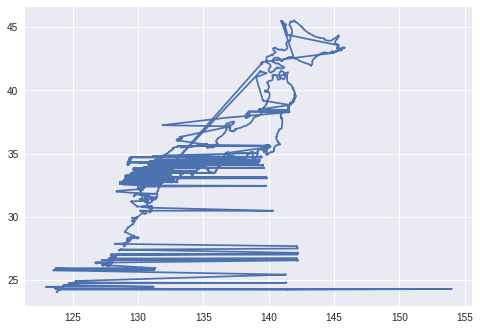

In [173]:
##super noisy plotting 
##see alternative way below

x_lon = np.zeros((len(shape_japan.points),1))
y_lat = np.zeros((len(shape_japan.points),1))
for ip in range(len(shape_japan.points)):
    x_lon[ip] = shape_japan.points[ip][0]
    y_lat[ip] = shape_japan.points[ip][1]
    

plt.plot(x_lon,y_lat)

# use bbox (bounding box) to set plot limits
#plt.xlim(shape_japan.bbox[0],shashape_japanpe_ex.bbox[2])
#plt.ylim(shape_japan.bbox[1],shape_japan.bbox[3])


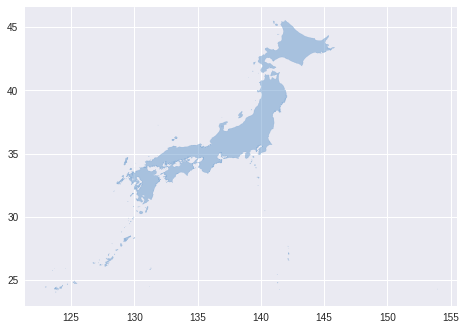

In [182]:
##use descartes package to visualize polygon data nicely
##see https://gis.stackexchange.com/questions/93136/how-to-plot-geo-data-using-matplotlib-python/93201#93201
from descartes import PolygonPatch


BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca()

poly = shape_japan.__geo_interface__
#or poly = sf.shape(120)
ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()

##Multi entry mapping

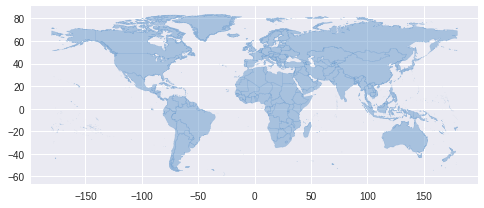

In [213]:
BLUE = '#6699cc'
fig = plt.figure() 
ax = fig.gca() 

for i in range(len(records)):
  poly = sf.shape(i).__geo_interface__
  #print poly
  ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()